# Practica 3

In [104]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import os

## 1) Cargue los datos de medios y examine estos datos.

- (a) ¿Qu´e atributos tienen los nodos y los links? 
- (b) Reproduzca la Figura 1.
- (c) Reproduzca la Figura 2. El tama˜no del nodo es proporcional al tama˜no de la audiencia (audience.size). Y el grosor de los links es proporcional al peso (weight)

In [87]:
links = pd.read_csv(os.path.join('..','clase_3','practica3','medios_edges.csv'))
nodes = pd.read_csv(os.path.join('..','clase_3','practica3','medios_nodes.csv'))

G = nx.from_pandas_edgelist(links, 
                            source='from',
                            target='to',
                            edge_attr=True,
                            create_using=nx.DiGraph())
nx.set_node_attributes(G, nodes.set_index('id').to_dict('index'))

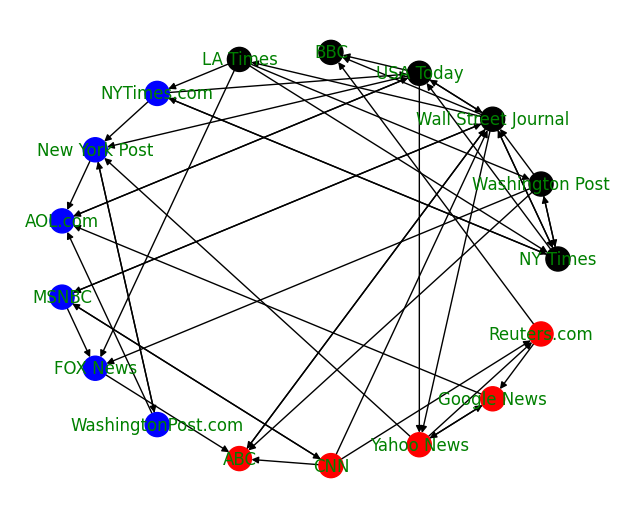

In [88]:
plt.figure(figsize=(6,5))
pos = nx.circular_layout(G)  
sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['type.label'])
color_node_map = {'Newspaper':'black','TV':'red','Online':'blue'}
labels=nx.get_node_attributes(G,'media')
node_colors = [color_node_map[nodes['type.label']] for _, nodes in sorted_nodes]

nx.draw(G, 
        pos, 
        with_labels=True, 
        node_color=node_colors,
        labels=labels, 
        font_color='green',
        arrows=True)

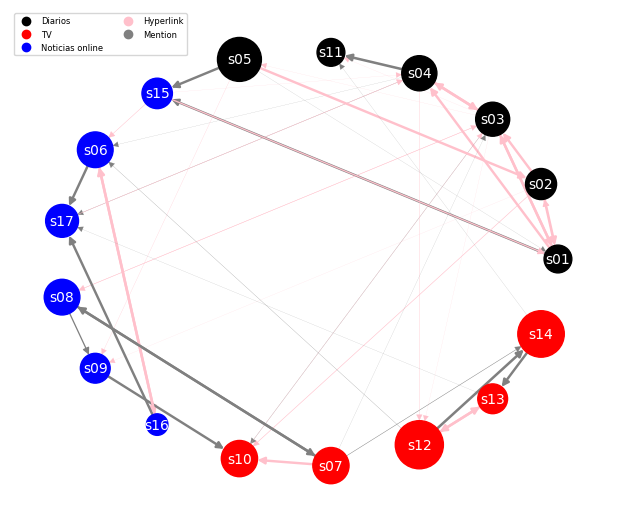

In [89]:
plt.figure(figsize=(6,5))
pos = nx.circular_layout(G)  
sorted_nodes = sorted(G.nodes(data=True), key=lambda x: x[1]['type.label'])
color_node_map = {'Newspaper':'black','TV':'red','Online':'blue'}
color_edge_map = {'hyperlink':'pink','mention':'grey'}
edge_colors = [color_edge_map[edges['type']] for _, _, edges in G.edges(data=True)]
node_colors = [color_node_map[nodes['type.label']] for _, nodes in sorted_nodes]
node_sizes = [nodes['audience.size']*20 for _, nodes in sorted_nodes]

legend_labels = ['Diarios', 'TV', 'Noticias online', 'Hyperlink', 'Mention']
legend_colors = ['black', 'red', 'blue','pink','grey']
legend_elements = [plt.Line2D([0], [0], marker='o', color=color, label=label, linestyle='None') for label, color in zip(legend_labels, legend_colors)]

nx.draw(G, 
        pos, 
        with_labels=True, 
        node_color=node_colors,
        node_size=node_sizes,
        edge_color=edge_colors,
        font_size=10, 
        font_color='white',
        width=weights,
        arrows=True)
plt.legend(handles=legend_elements, ncol=2, loc='upper left', fontsize=6)

## 7) 

Los datos “primary-school-proximity-attr.cvs” corresponden a interacciones entre chicos y maestros de primaria. Cada nodo est´a etiquetado con su categor´ıa. Ejemplo: 560 1570 3B 3B, interacci´on entre dos chic@s de tercero B.

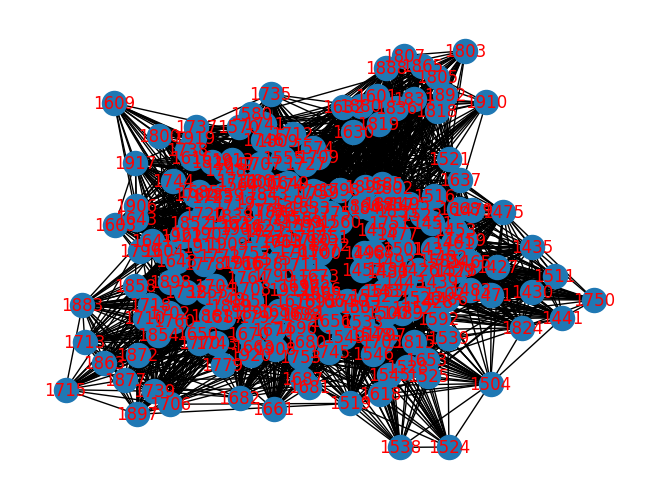

In [101]:
a = pd.read_csv(os.path.join('..','clase_3','practica3','primary_school_proximity_attr.csv'))
g=nx.from_pandas_edgelist(a,
                          source='X1558',
                          target='X1567')

nx.draw(g,
        with_labels=True,
        font_color='red')

#### Cual es el nodo con mas betweness centrality?

In [104]:
bet_cent = nx.betweenness_centrality(g)
for n in bet_cent:
    g.nodes[n]["betweenness_centrality"] = bet_cent[n]

sorted([(e,g.nodes[e]["betweenness_centrality"]) for e in g.nodes],
        key = lambda x: x[1], reverse = True)

[(1551, 0.013270962739313346),
 (1761, 0.010299139150097685),
 (1890, 0.009915366450965146),
 (1552, 0.009816646016022586),
 (1665, 0.009243899736491683),
 (1613, 0.009159601451164845),
 (1579, 0.008740751914188797),
 (1851, 0.008706620171539904),
 (1708, 0.008576683128491724),
 (1628, 0.008552534751028561),
 (1673, 0.00836514716125622),
 (1780, 0.008226304919442274),
 (1700, 0.008142805664809145),
 (1765, 0.008126839798377543),
 (1866, 0.007995580454847488),
 (1457, 0.006894366012295784),
 (1697, 0.0068208354799091575),
 (1477, 0.006795635829698543),
 (1563, 0.0067132796945543315),
 (1458, 0.006679191228386852),
 (1916, 0.0065799326970544),
 (1503, 0.006561643708387989),
 (1833, 0.0065152745828479875),
 (1498, 0.00647100321378439),
 (1666, 0.006394809439871936),
 (1847, 0.006355596568864617),
 (1625, 0.006349551218107781),
 (1480, 0.006256881031039339),
 (1730, 0.00616015028553974),
 (1572, 0.006133692694536004),
 (1757, 0.00595672139811596),
 (1902, 0.005910879595593589),
 (1560, 0.0

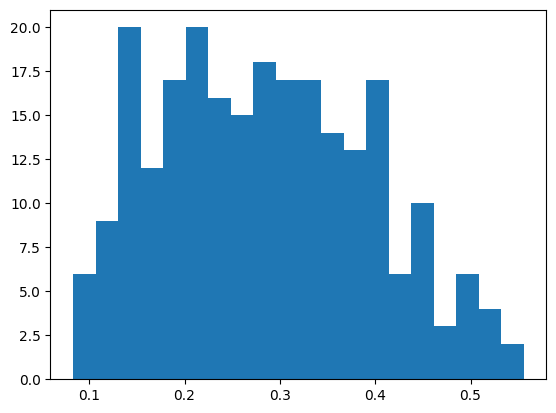

In [121]:
# Compute the degree centralities: dcs
dcs = nx.degree_centrality(g)

# Get the degree centralities for user_nodes: user_dcs
one_dcs = [dcs[n] for n in g]

# Plot the degree distribution of users_dcs
plt.hist(one_dcs, bins=20)
plt.show()

## 9) Para la red karate.txt calcule las siguientes medidas:
### (a) clustering de cada nodo. 
1. Graficar la red con los nodos en colores usando esta medida.
2. Graficar el valor del clustering promedio para los nodos que tienen degree k en funci´on de k.

### (b) knn de cada nodo. 
1. Graficar la red con los nodos en colores usando esta medida.
2. Graficar el valor de knn promedio para los nodos que tienen degree k en funci´on de k.
3. Calcule el coeficiente de asortatividad de Newman. Es decir, la correlaci´on de Pearson entre los grados de nodos vecinos. No use ninguna funci´on predeterminada de para calcular este coeficiente. Verifique que el valor d´e r ≈ −0,47.

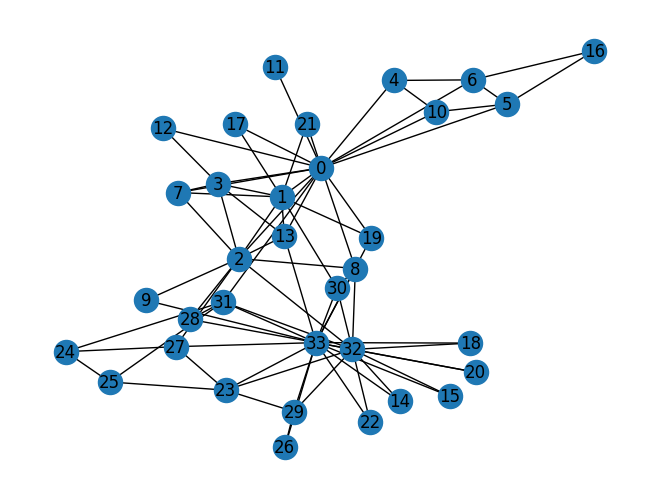

In [3]:
G = nx.read_edgelist(os.path.join('..','clase_2','practica2','karate.txt'))

nx.draw(G,with_labels=True)

In [145]:
dict(G.degree).values()

dict_values([16, 9, 10, 6, 3, 4, 4, 4, 5, 3, 1, 2, 5, 2, 3, 2, 6, 4, 2, 4, 3, 12, 2, 17, 2, 2, 2, 2, 2, 5, 3, 4, 3, 2])

In [146]:
dict(nx.clustering(G)).values()

dict_values([0.15, 0.3333333333333333, 0.24444444444444444, 0.6666666666666666, 0.6666666666666666, 0.5, 0.5, 1.0, 0.5, 0.6666666666666666, 0, 1.0, 0.6, 1.0, 0.3333333333333333, 1.0, 0.2, 0.5, 0, 0.16666666666666666, 0.3333333333333333, 0.19696969696969696, 1.0, 0.11029411764705882, 1.0, 1.0, 1.0, 1.0, 1.0, 0.4, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 1.0])

In [34]:
v1 = nx.clustering(G)
v2 = nx.average_degree_connectivity(G)

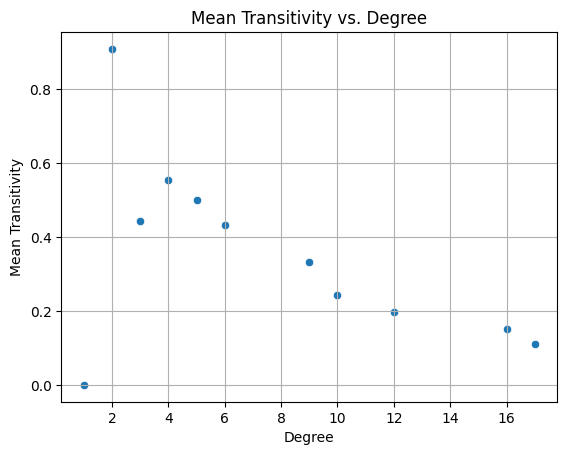

In [150]:
from collections import defaultdict
def plot_mean_transitivity_by_degree(graph):
    # Step 1: Calculate the degree and transitivity for each node
    degrees = dict(graph.degree)
    transitivity = nx.clustering(graph)

    # Step 2: Group transitivity values based on degree
    transitivity_by_degree = defaultdict(list)
    for node, t in transitivity.items():
        degree = degrees[node]
        transitivity_by_degree[degree].append(t)

    # Step 3: Calculate the mean transitivity for each degree group
    degrees = []
    mean_transitivity = []
    for degree, transitivity_list in transitivity_by_degree.items():
        degrees.append(degree)
        mean_transitivity.append(sum(transitivity_list) / len(transitivity_list))

    # Step 4: Plot the mean transitivity as a function of the degree
    sns.scatterplot(x=degrees, y=mean_transitivity, marker='o')
    plt.xlabel('Degree')
    plt.ylabel('Mean Transitivity')
    plt.title('Mean Transitivity vs. Degree')
    plt.grid(True)
    plt.show()

plot_mean_transitivity_by_degree(G)

C:\Users\Alan\AppData\Local\Temp\ipykernel_11084\1407177429.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cool')
C:\Users\Alan\AppData\Local\Temp\ipykernel_11084\1407177429.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


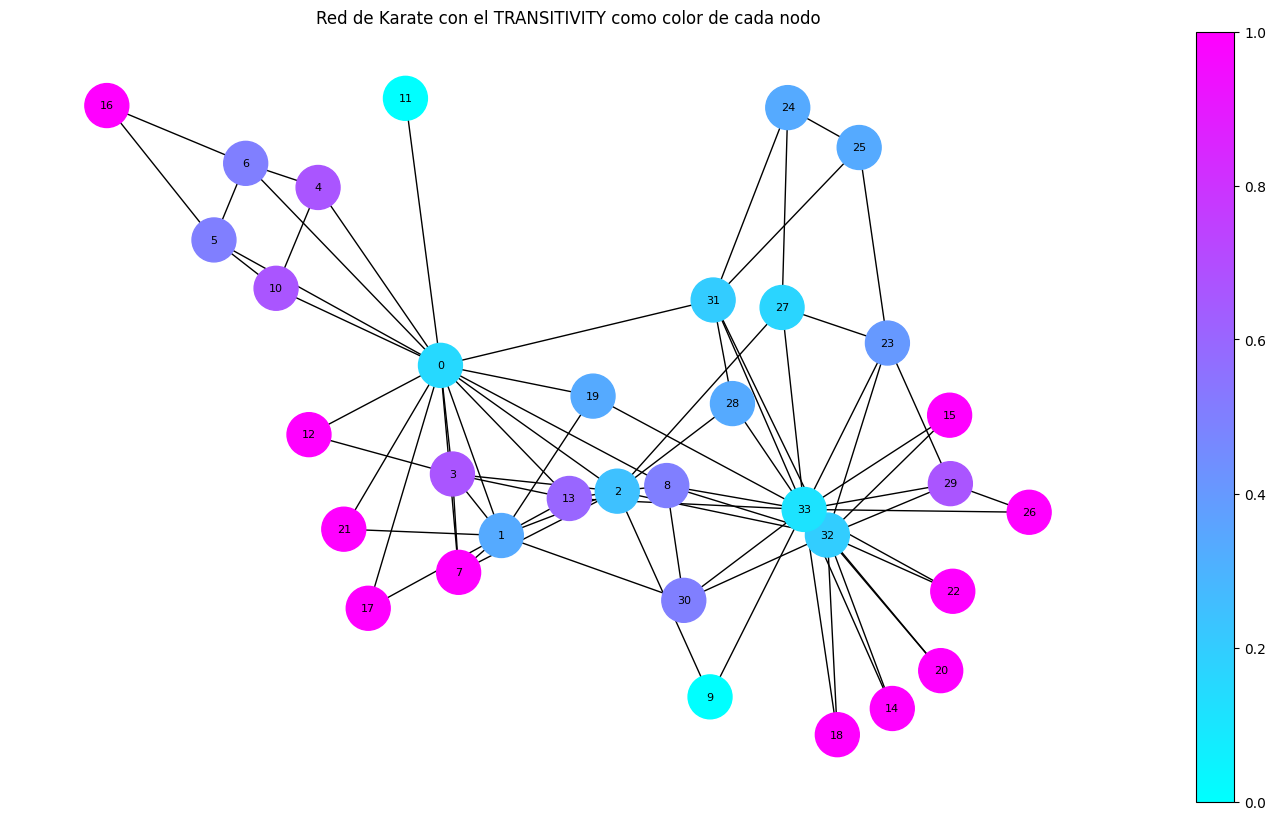

In [124]:
cmap = plt.cm.get_cmap('cool')
fig,ax = plt.subplots(figsize=(18,10))
colors = [cmap(value) for value in v1.values()]
pos=nx.spring_layout(G, seed=1)

nx.draw(G,
        pos=pos,
        font_size=8,
        with_labels=True,
        node_size=1000,
        node_color=colors
        )
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm)
plt.title('Red de Karate con el TRANSITIVITY como color de cada nodo');

C:\Users\Alan\AppData\Local\Temp\ipykernel_11084\655472881.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')  # Choose a colormap, e.g., 'cool', 'viridis', 'jet', etc.
C:\Users\Alan\AppData\Local\Temp\ipykernel_11084\655472881.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


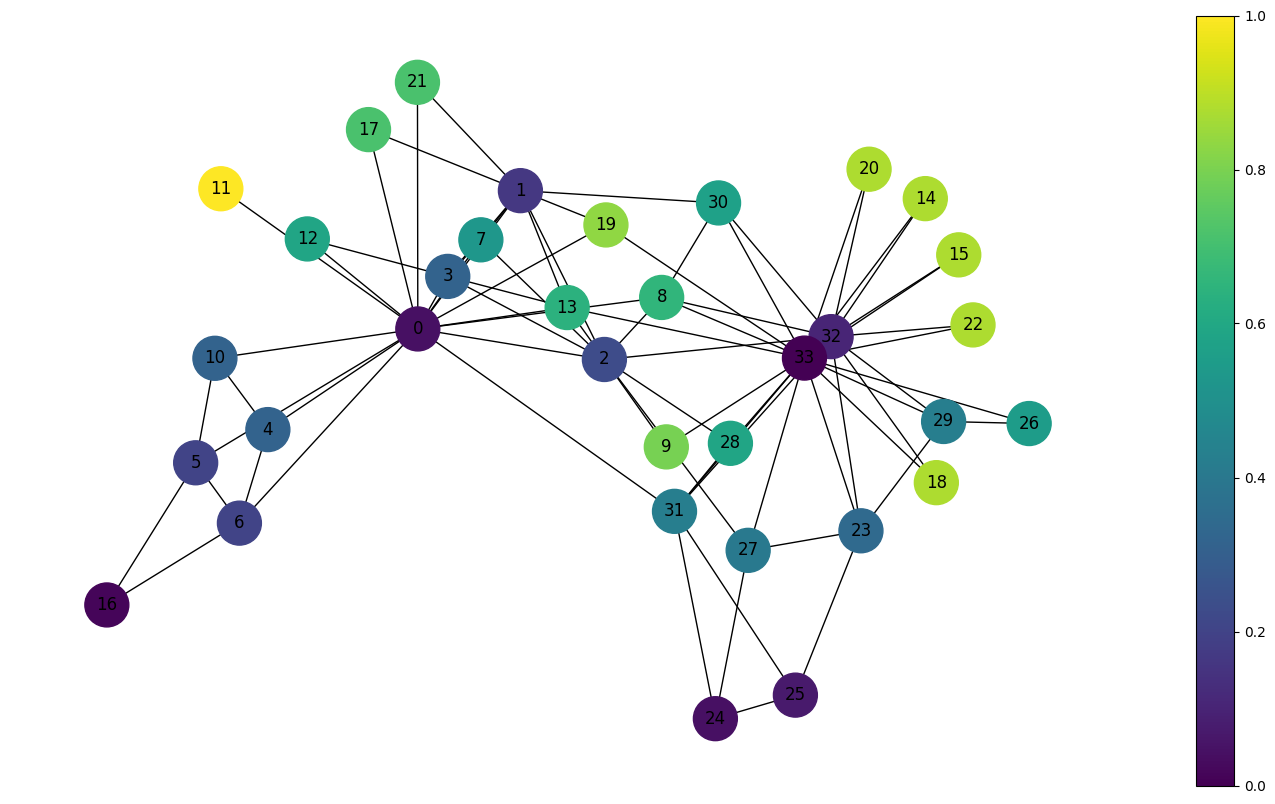

In [163]:

def color_graph_based_on_degree(graph):
    # Step 1: Calculate average degree connectivity
    avg_degree_connectivity = {node: sum(graph.degree(neighbor) for neighbor in graph.neighbors(node)) / graph.degree(node)
                               for node in graph.nodes}

    # Step 2: Set up colormap
    cmap = plt.cm.get_cmap('viridis')  # Choose a colormap, e.g., 'cool', 'viridis', 'jet', etc.

    fig,ax = plt.subplots(figsize=(18,10))

    # Step 3: Draw the graph with node colors based on average degree connectivity
    nx.draw(graph,
            node_color=list(avg_degree_connectivity.values()), 
            cmap=cmap,
            node_size=1000, 
            with_labels=True)

    # Add a colorbar to the plot
    sm = plt.cm.ScalarMappable(cmap=cmap)
    plt.colorbar(sm)

    # Show the plot
    plt.show()

color_graph_based_on_degree(G)

<Axes: xlabel='Degree', ylabel='Valor de clustering promedio'>

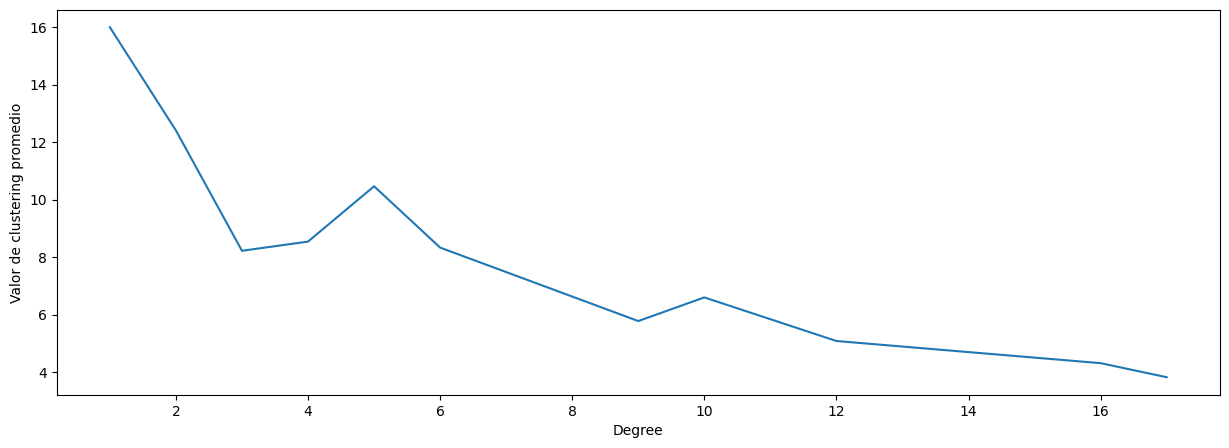

In [52]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xlabel("Degree")
plt.ylabel("Valor de clustering promedio")
sns.lineplot(x=list(v2.keys()),y=list(v2.values()),ax=ax)

In [53]:
nx.degree_assortativity_coefficient(G)

-0.47561309768461413

In [103]:
def get_node_and_connected_node_degrees(graph):
    node_degrees = []
    neighbor_degrees = []

    for node in graph.nodes:
        node_degree = graph.degree[node]
        for neighbor in graph.neighbors(node):
            neighbor_degree = graph.degree[neighbor]
            node_degrees.append(node_degree)
            neighbor_degrees.append(neighbor_degree)
    
    return node_degrees, neighbor_degrees

deg, deg2 = get_node_and_connected_node_degrees(G)

print(round(pearsonr(deg,deg2)[0],4))

np.allclose(round(pearsonr(deg,deg2)[0],4),round(nx.degree_assortativity_coefficient(G),4))

-0.4756


True

# Practica 4